<h1 align="center"> Neural Network Two Layers Classifier </h1>

<div align="center"> Author: 22110980014 Xu Shi</div>

GitHub: https://github.com/Shixu-max/Numpy-neural-network-two-layers-classifier

Model in Baidu Netdisk: https://pan.baidu.com/s/1hzkMCHe8OqT3ZuXBRyiuug

where Baidu Netdisk's fetch code: t5jp

MNIST: https://academictorrents.com/details/323a0048d87ca79b68f12a6350a57776b6a3b7fb


## Contents

- [Train](#train)
- [Parameter Seek](#parameter-seek)
- [Validation](#validation)
- [Visualization](#visualization)

# Train

In [2]:
import numpy as np
from twolayerclassifier import Classifier
from matplotlib import pyplot as plt
import pickle
import gzip

def load_data(path):
    f = gzip.open(path, 'rb')
    training_data, validation_data, test_data = pickle.load(f, encoding="latin1")
    f.close()
    return (training_data, validation_data, test_data)

# use handwriting data in MNIST DATASETS
# training_data: (50000 * 784, 50000, validation_data: (10000 * 784, 10000), test_data: (10000 * 784, 10000)
path = 'mnist.pkl.gz'
training_data , validation_data , test_data = load_data(path)
data_x = training_data[0]
data_y = np.eye(10)[training_data[1]] #Onehot encoding
valid_x = validation_data[0]
valid_y = np.eye(10)[validation_data[1]]

### Change Activation Function

In [3]:
# train two layers classifier in different activation function
np.random.seed(2023)
nn = Classifier([784,900,10],['relu','sigmoid'], lr = 0.03125)

### Change Loss Function

In [5]:
# train model in different loss function
result = nn.trmodel(data_x, data_y, epochs = 10, batch_size = 40, loss_func = 'MSE', 
                valid_x = valid_x, valid_y = valid_y, valid_freq = 1)

100%|██████████| 1250/1250 [00:11<00:00, 108.80it/s]


### Save Model

In [6]:
# save model
nn.save(r'trained model.txt')

### Plot figures

dict_keys(['loss', 'acc', 'loss_valid'])
Validation Accuracy = [0.9705, 0.9742, 0.9768, 0.9778, 0.978, 0.9799, 0.9819, 0.9827, 0.9812, 0.9834]


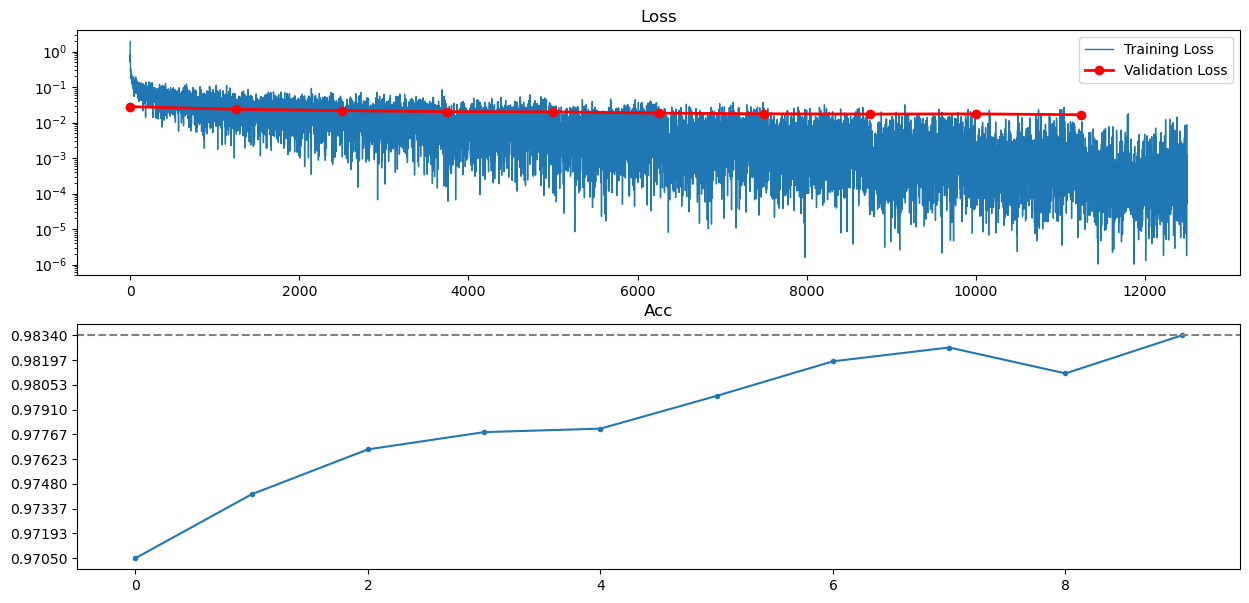

In [7]:
from figureplot import figureplot
print(result.keys())
figureplot(result, True)

# Parameter Seek

Seek the best paramters: learn rate, hidden sizes,and regularization strengeth.

### Learn Rate

In [8]:
# find the optimal learn rate
from IPython.display import clear_output
from time import sleep
lrs = [1, 1/2, 1/4, 1/8, 1/16, 1/32, 1/64, 1/128]
epochs = 10
accuracies = []
optimal = 0
optimal_acc = 0
for lr in lrs:
    print(f'Training learning rate = {lr}')
    sleep(0.25)
    np.random.seed(2023)
    nn = Classifier([784,500,10],['relu','sigmoid'], lr = lr)
    result2 = nn.trmodel(data_x, data_y, epochs, 40, 'MSE', valid_x, valid_y, 1)
    accuracies.append(result2['acc'][-1])
    if result2['acc'][-1] > optimal_acc:
        optimal_acc = result2['acc'][-1]
        optimal = lr
    clear_output(wait = True)
print('All acc =', accuracies)
print('Optimal Lr =', optimal, '\nOptimal Acc =', optimal_acc)

Training learning rate = 0.25


 92%|█████████▏| 1153/1250 [00:05<00:00, 204.36it/s]


KeyboardInterrupt: 

### Hidden Layer Size

In [127]:
# find the optimal hidden layer size
from IPython.display import clear_output
from time import sleep
hidden_sizes = [50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
epochs = 10
accuracies = []
optimal = 0
optimal_acc = 0
for hidden_size in hidden_sizes:
    print(f'Training hidden size = {hidden_size}')
    sleep(0.25)
    np.random.seed(2023)
    nn = Classifier([784,hidden_size,10],['relu','sigmoid'], lr = 0.03125)
    result2 = nn.trmodel(data_x, data_y, epochs, 40, 'MSE', valid_x, valid_y, 1)
    accuracies.append(result2['acc'][-1])
    if result2['acc'][-1] > optimal_acc:
        optimal_acc = result2['acc'][-1]
        optimal = hidden_size
    clear_output(wait = True)
print('All acc =', accuracies)
print('Optimal Size =', optimal, '\nOptimal Acc =', optimal_acc)

Training hidden size = 100


  7%|▋         | 85/1250 [00:00<00:01, 906.68it/s]


KeyboardInterrupt: 

### Regularization Strength

In [112]:
# find the optimal regularization strength
from IPython.display import clear_output
from time import sleep
regs = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 0]
epochs = 10
accuracies = []
optimal = 0
optimal_acc = 0
for reg in regs:
    print(f'Training regularization = {reg}')
    sleep(0.25)
    np.random.seed(2023)
    nn = Classifier([784,900,10],['relu','sigmoid'], lr = 0.03125, regws=[reg,reg])
    result2 = nn.trmodel(data_x, data_y, epochs, 40, 'MSE', valid_x, valid_y, 1)
    accuracies.append(result2['acc'][-1])
    if result2['acc'][-1] > optimal_acc:
        optimal_acc = result2['acc'][-1]
        optimal = reg
    clear_output(wait = True)
    
print('All acc =', accuracies)
print('Optimal Reg =', optimal, '\nOptimal Acc =', optimal_acc)

All acc = [0.9834]
Best Reg = 0 
Best Acc = 0.9834
1


# Validation

Validate our model on the training data, validation data and the testing data.

In [147]:
# load model
nn = Classifier.load(r'trained model.txt')

In [148]:
from time import sleep 
print('-'*30 + '\nAccuracy on Training Data')
sleep(0.25)
nn.predict(data_x, data_y)
print('-'*30 + '\nAccuracy on Validation Data')
sleep(0.25)
nn.predict(validation_data[0], np.eye(10)[validation_data[1]])
print('-'*30 + '\nAccuracy on Testing Data')
sleep(0.25)
nn.predict(test_data[0], np.eye(10)[test_data[1]])
print(end = '')

------------------------------
Accuracy on Training Data


100%|██████████| 1250/1250 [00:00<00:00, 1517.66it/s]


Acc = 49998/50000 = 99.996%
------------------------------
Accuracy on Validation Data


100%|██████████| 250/250 [00:00<00:00, 1440.37it/s]


Acc = 9834/10000 = 98.34%
------------------------------
Accuracy on Testing Data


100%|██████████| 250/250 [00:00<00:00, 1416.21it/s]

Acc = 9838/10000 = 98.38%
